# 01 - Exploratory Data Analysis (EDA)

Author:
- Santosh Yadaw
- santoshyadawprl@gmail.com

## a. Setup

In [46]:
import os
import re
import logging
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import trange
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from nltk import tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


tqdm.pandas()

In [3]:
# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging

In [7]:
# Constants
HOME_PATH = os.path.split(os.getcwd())[0]
logger.info(f"HOME_PATH: {HOME_PATH}")
DATA_PATH = os.path.join(HOME_PATH,"data", "raw", "task2.csv")
logger.info(f"DATA_PATH: {DATA_PATH}")

INFO:root:HOME_PATH: /home/jupyter/text-gen
INFO:root:DATA_PATH: /home/jupyter/text-gen/data/raw/task2.csv


In [10]:
# Load Data
data = pd.read_csv(DATA_PATH, encoding="ISO-8859-1")
data = data.T.reset_index().T.reset_index(drop=True).rename(columns={0: "text"})
data.head()

,text
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...


## b. EDA

- Character count
- Word count
- Mean word length
- Mean Sentence Length
- Term Frequency Analysis
- Most occuring ngrams

In [33]:
# Helper functions
def word_count(text_data):
    """
    Calculate the word count given a text.
    """
    text_data_list = text_data.split()
    return len(text_data_list)

def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data[col])
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()
    
def clean(review):
    # Convert to lower case
    review = review.lower()
    # Remove any numbers
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    # Remove any stopwords in english
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

def corpus(text):
    text_list = text.split()
    return text_list

In [12]:
# Add character count
data['Length'] = data['text'].str.len()

In [15]:
# Add word count
data['Word_count'] = data['text'].apply(word_count)

In [19]:
# Add average word length
data['mean_word_length'] = data['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

In [22]:
data['mean_sent_length'] = data['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

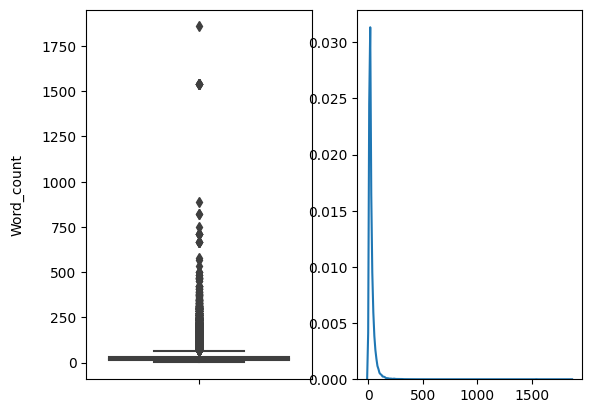

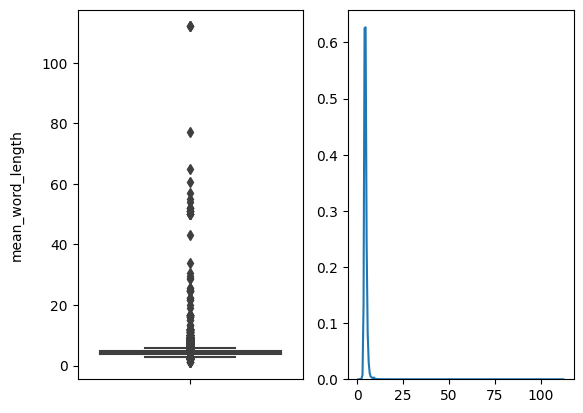

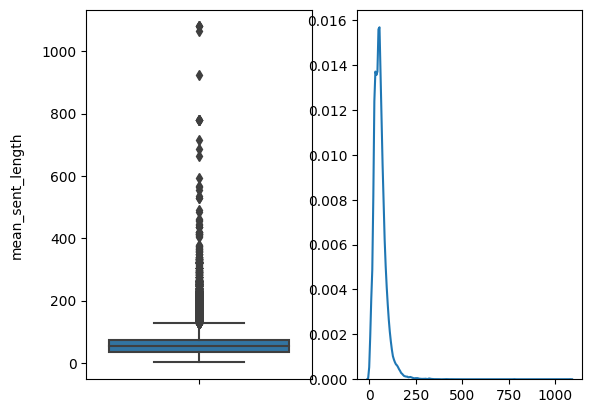

In [29]:
# Plot the distribution curve
features = data.columns.tolist()[2:]
for feature in features:
    visualize(feature)

In [40]:
# Term frequency analysis
data['text'] = data['text'].progress_apply(clean)
data['text_lists'] = data['text'].progress_apply(corpus)

corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['text_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 67991/67991 [00:00<00:00, 192889.47it/s]


995570

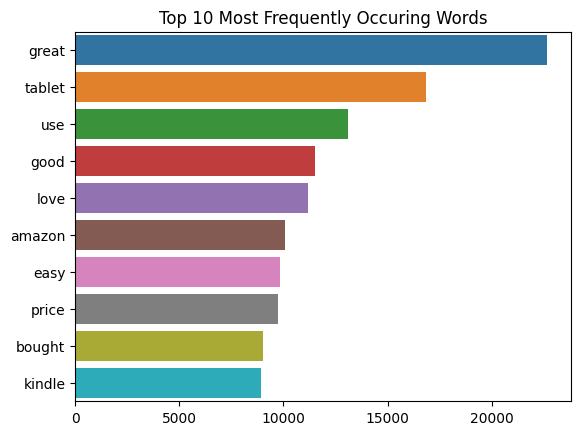

In [43]:
# Get the top 10 most common words and the count
mostCommon = Counter(corpus).most_common(10)

words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
    
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [44]:
# Get the statistics
data.describe()

,Length,Word_count,mean_word_length,mean_sent_length
count,67991.000000,67991.000000,67991.000000,67991.000000
mean,150.249401,28.586460,4.420729,59.185383
std,196.724205,36.629556,1.417298,36.840121
min,1.000000,1.000000,1.000000,1.000000
25%,64.000000,12.000000,3.963300,36.000000
50%,99.000000,19.000000,4.285714,53.333333
75%,175.000000,34.000000,4.675000,73.000000
max,10670.000000,1858.000000,112.000000,1080.000000


### Observations:
 - Dataset seems to be on amazon product reviews regarding tablets
 - General sentiments seems to indicate majority of the reviews contains positive sentiments words like great and love. Also they seem to talk about the price

In [47]:
# Use vocab size of 20-35k for english
cv = CountVectorizer(max_features=35000,ngram_range=(2,2),dtype="uint8")
bigrams = cv.fit_transform(data['text'])

In [48]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

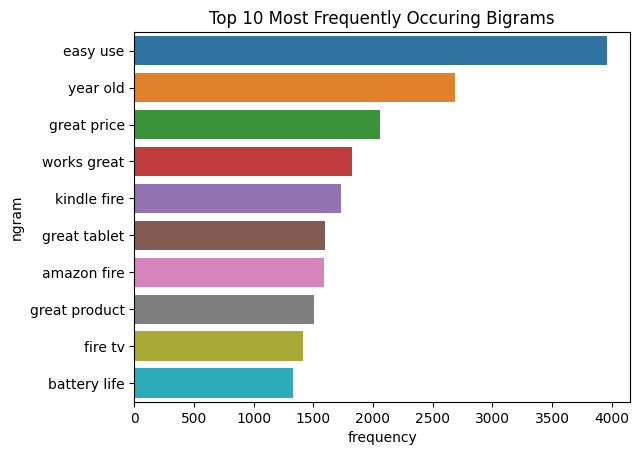

In [49]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [50]:
cv1 = CountVectorizer(ngram_range=(3,3),max_features=35000,dtype="uint8")
trigrams = cv1.fit_transform(data['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

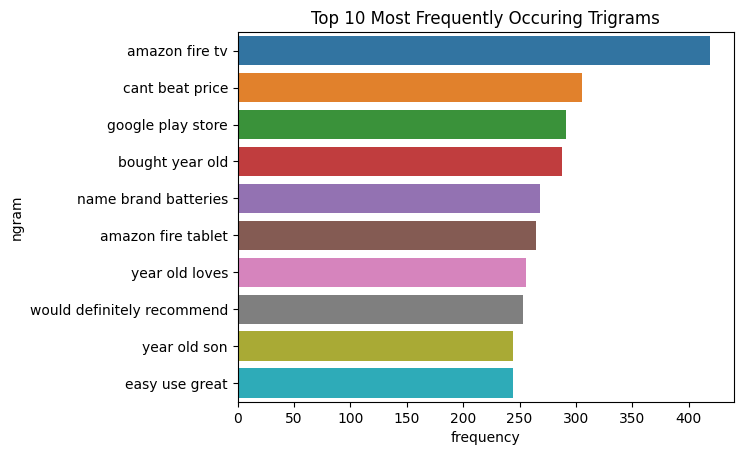

In [51]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

### Observations
 - Majority of the samples seem to be regarding the amazon fire tablet
 - Reviews are centered around ease of use, great product tablet and battery life

## End